In [1]:
!uv sync
import math
from collections.abc import Iterable
from itertools import pairwise, chain
from typing import Callable

import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import polars as pl
import seaborn as sns
import tqdm.auto as tqdm
from torch import nn

import pytorch_semifield_conv

Resolved 163 packages in 1ms
Prepared 2 packages in 287ms                                             
Uninstalled 2 packages in 0.72ms
Installed 2 packages in 0.70ms=0.1.0 (from file:///home/pete
 ~ pytorch-numba-extension-jit==0.1.0 (from file:///home/peter/Thesis/pytorch-numba-extension-jit)
 ~ pytorch-semifield-conv==0.1.0 (from file:///home/peter/Thesis/pytorch-semifield-conv)


In [2]:
from pathlib import Path
import os

if not Path("./src/models").is_dir():
    for parent_path in Path.cwd().parents:
        if (parent_path / "src/models").is_dir():
            os.chdir(parent_path)
            break
    else:
        raise FileNotFoundError("Can't find project root")

assert Path("./src/models").is_dir()

In [3]:
from src.models import LeNet, EXAMPLE_POOLING_FUNCTIONS, CIFAR10CNN
from src.models.utils import HistoryCallback, make_pooling_function
from src import load_data

In [4]:
import importlib

# from src.kernels import quadratic as quad_kernels
import src.models.simple_lenet
import src.load_data
import src.models.utils
import src.kernels.quadratic
import pytorch_semifield_conv.cuda_select

importlib.reload(src.kernels.quadratic)
importlib.reload(src.kernels)
importlib.reload(src.kernels.utils)
importlib.reload(pytorch_semifield_conv.cuda_select)
importlib.reload(pytorch_semifield_conv.unfold_broadcast)
importlib.reload(src.models.utils)
importlib.reload(src.models.simple_lenet)
importlib.reload(src.models)
importlib.reload(src.load_data)
from src.models import LeNet, EXAMPLE_POOLING_FUNCTIONS
from src import load_data

# kernels = importlib.reload(kernels)
# convolutions = importlib.reload(convolutions)

ModuleNotFoundError: No module named 'src.kernels'

In [6]:
torch.set_float32_matmul_precision("high")

In [4]:
k_mnist = load_data.k_mnist()
k_mnist

Dataset(x_train=torch.Size([60000, 1, 28, 28]), x_test=torch.Size([10000, 1, 28, 28]), y_train=torch.Size([60000]), y_test=torch.Size([10000]))

In [5]:
fashion = load_data.fashion_mnist()
fashion

Dataset(x_train=torch.Size([60000, 1, 28, 28]), x_test=torch.Size([10000, 1, 28, 28]), y_train=torch.Size([60000]), y_test=torch.Size([10000]))

In [4]:
cifar10 = load_data.cifar10()
cifar10

Dataset(x_train=torch.Size([50000, 3, 32, 32]), x_test=torch.Size([10000, 3, 32, 32]), y_train=torch.Size([50000]), y_test=torch.Size([10000]))

In [4]:
svhn = load_data.svhn()
svhn

Dataset(x_train=torch.Size([73257, 3, 32, 32]), x_test=torch.Size([26032, 3, 32, 32]), y_train=torch.Size([73257]), y_test=torch.Size([26032]))

In [4]:
import torchvision

svhn = torchvision.datasets.SVHN(root="./.data/")

In [8]:
torchvision.datasets.CIFAR10(root="./.data/").data.shape

(50000, 32, 32, 3)

In [9]:
torch.unique(torch.tensor([1, 2, 3, 1], dtype=torch.float32))

tensor([1., 2., 3.])

In [32]:
k = kernels.QuadraticKernelSpectral2D(1, 10, 3, {"var": "ss-iso", "theta": "uniform"})
k

QuadraticKernelSpectral2D(
  1, 10, kernel_size=3
  (covs): LearnedSpectral2D(1, 10)
)

In [ ]:
LeNet.fit_many(k_mnist, epochs=50, batch_size=1024, lr=0.004,
               pool_fn=make_pooling_function("aniso", 27, is_closing=True),
               count=5, init={"var": "ss-iso", "theta": "spin"}).scores

In [7]:
CIFAR10CNN.fit_many(cifar10, batch_size=64, lr=0.001, pool_fn="aniso-7", init={"var": "ss-iso", "theta": "spin"},
                    count=3, epochs=100)

aniso-7:{'var': 'ss-iso', 'theta': 'spin'}:   0%|          | 0/3 [00:00<?, ?run/s]

FitManyResult(scores=shape: (3, 7)
┌──────────┬──────────┬──────────┬──────────┬─────────────┬───────────────┬────────────┐
│ acc      ┆ min_f1   ┆ max_f1   ┆ macro_f1 ┆ train_times ┆ compile_times ┆ times      │
│ ---      ┆ ---      ┆ ---      ┆ ---      ┆ ---         ┆ ---           ┆ ---        │
│ f64      ┆ f64      ┆ f64      ┆ f64      ┆ f64         ┆ f64           ┆ f64        │
╞══════════╪══════════╪══════════╪══════════╪═════════════╪═══════════════╪════════════╡
│ 0.870893 ┆ 0.742026 ┆ 0.944081 ┆ 0.869488 ┆ 175.139215  ┆ 2.860776      ┆ 177.999991 │
│ 0.869191 ┆ 0.744887 ┆ 0.940998 ┆ 0.868265 ┆ 187.957692  ┆ 0.004232      ┆ 187.961924 │
│ 0.868189 ┆ 0.744312 ┆ 0.944444 ┆ 0.866933 ┆ 192.867767  ┆ 0.004079      ┆ 192.871845 │
└──────────┴──────────┴──────────┴──────────┴─────────────┴───────────────┴────────────┘, models=None)

In [17]:
CIFAR10CNN.fit_many(cifar10, batch_size=1024, lr=0.004, pool_fn="standard-2",
                    count=3, epochs=150)

standard-2:None:   0%|          | 0/3 [00:00<?, ?run/s]

FitManyResult(scores=shape: (3, 7)
┌──────────┬──────────┬──────────┬──────────┬─────────────┬───────────────┬───────────┐
│ acc      ┆ min_f1   ┆ max_f1   ┆ macro_f1 ┆ train_times ┆ compile_times ┆ times     │
│ ---      ┆ ---      ┆ ---      ┆ ---      ┆ ---         ┆ ---           ┆ ---       │
│ f64      ┆ f64      ┆ f64      ┆ f64      ┆ f64         ┆ f64           ┆ f64       │
╞══════════╪══════════╪══════════╪══════════╪═════════════╪═══════════════╪═══════════╡
│ 0.85026  ┆ 0.688445 ┆ 0.934911 ┆ 0.848227 ┆ 70.616517   ┆ 3.525426      ┆ 74.141943 │
│ 0.857856 ┆ 0.737086 ┆ 0.939064 ┆ 0.856945 ┆ 68.779301   ┆ 0.002876      ┆ 68.782177 │
│ 0.84885  ┆ 0.709295 ┆ 0.934189 ┆ 0.847414 ┆ 68.719117   ┆ 0.002623      ┆ 68.72174  │
└──────────┴──────────┴──────────┴──────────┴─────────────┴───────────────┴───────────┘, models=None)

In [8]:
CIFAR10CNN.fit_many(cifar10, batch_size=64, lr=0.001, pool_fn="standard-2",
                    count=3, epochs=100)

standard-2:None:   0%|          | 0/3 [00:00<?, ?run/s]

KeyboardInterrupt: 

In [8]:
CIFAR10CNN.fit_many(svhn, batch_size=1024, lr=0.004, pool_fn="aniso-7", init={"var": "ss-iso", "theta": "spin"},
                    count=3, epochs=100)

aniso-7:{'var': 'ss-iso', 'theta': 'spin'}:   0%|          | 0/3 [00:00<?, ?run/s]

KeyboardInterrupt: 

In [16]:
cifar10

Dataset(x_train=torch.Size([50000, 3, 32, 32]), x_test=torch.Size([10000, 3, 32, 32]), y_train=torch.Size([50000]), y_test=torch.Size([10000]))

In [27]:
import numpy as np


class InspectScalesCallback:
    store_targets = {
        kernels.quadratic.QuadraticKernelIso2D: ("log_std",),
        kernels.quadratic.CovSpectral2D: ("log_std", "theta"),
    }

    def __init__(self):
        self.mod_counter = None
        self.store = {}

    def __call__(self, model: nn.Module, _):
        self.mod_counter = 0
        self._recurse_mod(model.net)

    def _recurse_mod(self, mod: torch.nn.Module):
        for child in mod.children():
            cls = type(child)
            if cls not in self.store_targets:
                self._recurse_mod(child)
                continue

            num, self.mod_counter = self.mod_counter, self.mod_counter + 1
            targets = self.store_targets[cls]
            for target in targets:
                val = getattr(child, target).squeeze().numpy(force=True)
                self.store.setdefault(f"{num}.{target}", []).append(val)

    def result(self, count: int = None):
        res = {}
        for name, vals in self.store.items():
            if count is None:
                res[name] = np.stack(vals)
            else:
                stacked = np.stack(vals)
                assert stacked.shape[0] % count == 0, "Total epochs not divisible by count?"
                res[name] = stacked.reshape((count, stacked.shape[0] // count, *stacked.shape[1:]))

        return res

In [62]:
km_large = k_mnist.upsample(5)
km_large

Dataset(x_train=torch.Size([60000, 1, 140, 140]), x_test=torch.Size([10000, 1, 140, 140]), y_train=torch.Size([60000]), y_test=torch.Size([10000]))

In [58]:
torch.set_float32_matmul_precision('high')

In [63]:
isc = InspectScalesCallback()
res = LeNet.fit_many(km_large, epochs=50, batch_size=1024, lr=0.004,
                     pool_fn=make_pooling_function("aniso", 14, group_broadcasting=True), epoch_callback=isc,
                     conv_dilation=5,
                     # conv_kernel_size=16,
                     count=3, init={"var": "skewed", "theta": "spin"}).scores
scales_normal = isc.result(3)
print(res)

<function make_pooling_function.<locals>.pooling_fn at 0x717e346d4680>:{'var': 'skewed', 'theta': 'spin'}:   0…

shape: (3, 7)
┌──────────┬──────────┬──────────┬──────────┬─────────────┬───────────────┬────────────┐
│ acc      ┆ min_f1   ┆ max_f1   ┆ macro_f1 ┆ train_times ┆ compile_times ┆ times      │
│ ---      ┆ ---      ┆ ---      ┆ ---      ┆ ---         ┆ ---           ┆ ---        │
│ f64      ┆ f64      ┆ f64      ┆ f64      ┆ f64         ┆ f64           ┆ f64        │
╞══════════╪══════════╪══════════╪══════════╪═════════════╪═══════════════╪════════════╡
│ 0.940104 ┆ 0.907982 ┆ 0.9554   ┆ 0.940055 ┆ 570.983477  ┆ 23.05056      ┆ 594.034036 │
│ 0.9426   ┆ 0.920951 ┆ 0.955828 ┆ 0.942492 ┆ 574.293987  ┆ 0.001912      ┆ 574.295899 │
│ 0.947483 ┆ 0.922732 ┆ 0.961332 ┆ 0.947355 ┆ 584.659129  ┆ 0.002008      ┆ 584.661137 │
└──────────┴──────────┴──────────┴──────────┴─────────────┴───────────────┴────────────┘


In [15]:
isc = InspectScalesCallback()
res = LeNet.fit_many(km_large, epochs=100, batch_size=1024, lr=0.004,
                     pool_fn=make_pooling_function("aniso", 14), epoch_callback=isc,
                     conv_dilation=3,
                     # conv_kernel_size=16,
                     count=3, init={"var": "skewed", "theta": "spin"}).scores
scales_alt = isc.result(3)
print(res)

<function make_pooling_function.<locals>.pooling_fn at 0x717eb44428e0>:{'var': 'skewed', 'theta': 'spin'}:   0…

shape: (3, 7)
┌──────────┬──────────┬──────────┬──────────┬─────────────┬───────────────┬────────────┐
│ acc      ┆ min_f1   ┆ max_f1   ┆ macro_f1 ┆ train_times ┆ compile_times ┆ times      │
│ ---      ┆ ---      ┆ ---      ┆ ---      ┆ ---         ┆ ---           ┆ ---        │
│ f64      ┆ f64      ┆ f64      ┆ f64      ┆ f64         ┆ f64           ┆ f64        │
╞══════════╪══════════╪══════════╪══════════╪═════════════╪═══════════════╪════════════╡
│ 0.958767 ┆ 0.941942 ┆ 0.972566 ┆ 0.958759 ┆ 170.386013  ┆ 0.120121      ┆ 170.506134 │
│ 0.950195 ┆ 0.917021 ┆ 0.9718   ┆ 0.950282 ┆ 169.987986  ┆ 0.001907      ┆ 169.989894 │
│ 0.95855  ┆ 0.939111 ┆ 0.973556 ┆ 0.958489 ┆ 170.249083  ┆ 0.001863      ┆ 170.250945 │
└──────────┴──────────┴──────────┴──────────┴─────────────┴───────────────┴────────────┘


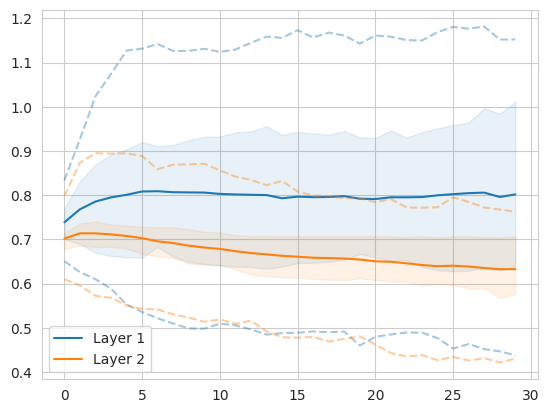

In [54]:
def plot_ci(vals: np.ndarray, ax: plt.Axes = None, label: str = ""):
    assert len(vals.shape) == 2, "Cannot plot multiple val types"
    if ax is None:
        _, ax = plt.subplots()

    q0, q1, q3, q4 = np.quantile(vals, [0, 0.25, 0.75, 1], axis=1)
    colour = ax.plot(vals.mean(axis=1), label=label)[0].get_color()
    ax.plot(q0, color=colour, linestyle="dashed", alpha=0.4)
    ax.plot(q4, color=colour, linestyle="dashed", alpha=0.4)
    ax.fill_between(range(len(vals)), q1, q3, color=colour, alpha=0.1)


_, test_ax = plt.subplots()
plot_ci(np.exp(scales["0.log_std"][0, ..., 0]), ax=test_ax, label="Layer 1")
# plot_ci(scales['0.theta'][0] % (2 * np.pi), ax=test_ax, label="Layer 1")
plot_ci(np.exp(scales["1.log_std"][0, ..., 0]), ax=test_ax, label="Layer 2")
# plot_ci(scales['1.theta'][0] % (2 * np.pi), ax=test_ax, label="Layer 2")
plt.legend()

In [36]:
scales_normal["1.log_std"].shape

(3, 50, 2)

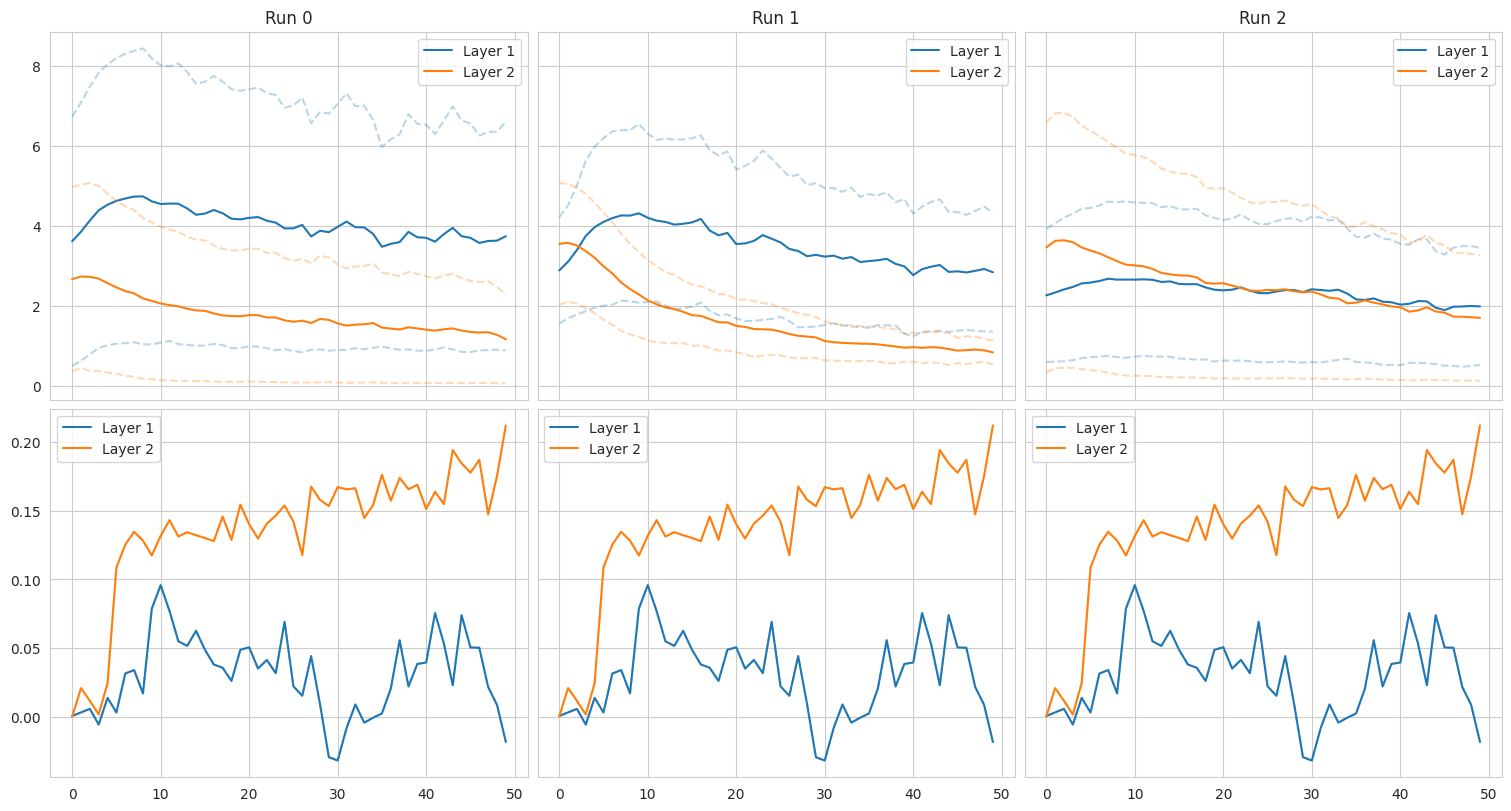

In [64]:
def plot_multi(vals: np.ndarray, ax: plt.Axes = None, label: str = ""):
    assert len(vals.shape) <= 2, "Cannot plot multiple val types"
    if len(vals.shape) == 1:
        vals = vals.reshape((-1, 1))
    if ax is None:
        _, ax = plt.subplots()

    colour = ax.plot(vals.mean(axis=1), label=label)[0].get_color()
    for channel in range(vals.shape[1]):
        ax.plot(vals[:, channel], color=colour, linestyle="dashed", alpha=0.3)


n_models = 3
sc = scales_normal
is_broadcast = len(sc["0.log_std"].shape) == 3
reduce_axes = () if is_broadcast else (-1)
_, (ax_hi, ax_lo) = plt.subplots(nrows=2, ncols=n_models, layout="compressed", figsize=(15, 8), sharex=True,
                                 sharey="row")
for i, test_ax in enumerate(ax_hi):
    test_ax.set_title(f"Run {i}")
    plot_multi(np.exp(2 * sc["0.log_std"][i].max(reduce_axes)), ax=test_ax, label="Layer 1")
    # plot_multi(sc['0.theta'][0], ax=test_ax, label="Layer 1")
    plot_multi(np.exp(2 * sc["1.log_std"][i].max(reduce_axes)), ax=test_ax, label="Layer 2")
    # plot_multi(sc['1.theta'][0], ax=test_ax, label="Layer 2")
    test_ax.legend()

for i, test_ax in enumerate(ax_lo):
    # plot_multi(np.exp(2 * sc["0.log_std"][i].min(reduce_axes)), ax=test_ax, label="Layer 1")
    plot_multi(sc['0.theta'][0], ax=test_ax, label="Layer 1")
    # plot_multi(np.exp(2 * sc["1.log_std"][i].min(reduce_axes)), ax=test_ax, label="Layer 2")
    plot_multi(sc['1.theta'][0], ax=test_ax, label="Layer 2")
    test_ax.legend()

In [9]:
kernels.QuadraticKernelIso2D(1, 1, 5, init=3.7)()

tensor([[[[-0.5405, -0.3378, -0.2703, -0.3378, -0.5405],
          [-0.3378, -0.1351, -0.0676, -0.1351, -0.3378],
          [-0.2703, -0.0676, -0.0000, -0.0676, -0.2703],
          [-0.3378, -0.1351, -0.0676, -0.1351, -0.3378],
          [-0.5405, -0.3378, -0.2703, -0.3378, -0.5405]]]],
       grad_fn=<ViewBackward0>)

In [11]:
# importlib.reload(src.kernels.utils)
# importlib.reload(src.kernels.quadratic)
# importlib.reload(src.kernels)
k2 = kernels.QuadraticKernelSpectral2D(1, 1, 5, init=3.7)
k3 = kernels.QuadraticKernelCholesky2D(1, 1, 5, init=3.7)
k2()

tensor([[[[-0.5405, -0.3378, -0.2703, -0.3378, -0.5405],
          [-0.3378, -0.1351, -0.0676, -0.1351, -0.3378],
          [-0.2703, -0.0676, -0.0000, -0.0676, -0.2703],
          [-0.3378, -0.1351, -0.0676, -0.1351, -0.3378],
          [-0.5405, -0.3378, -0.2703, -0.3378, -0.5405]]]],
       grad_fn=<MulBackward0>)

In [186]:
k2.covs.cov()

tensor([[[[3.0000, 0.0000],
          [0.0000, 3.0000]]]], grad_fn=<LinalgInvExBackward0>)

In [13]:
if "res" not in globals():
    res = {}
res = res

In [139]:
importlib.reload(src.models.trainer)
importlib.reload(src.models.simple_lenet)
importlib.reload(src.models)
importlib.reload(src.load_data)
importlib.reload(src.kernels.quadratic)
importlib.reload(src.kernels)
from src.models import LeNet, EXAMPLE_POOLING_FUNCTIONS
from src import load_data

# pool_fn = 'iso-5'
for pool_fn in tqdm.tqdm(EXAMPLE_POOLING_FUNCTIONS, desc="Pooling types", unit="trial"):
    res[pool_fn] = LeNet.fit_many(k_mnist, pool_fn=pool_fn, init="uniform", batch_size=1024, epochs=30)

Pooling types:   0%|          | 0/10 [00:00<?, ?trial/s]

standard-2:uniform:   0%|          | 0/20 [00:00<?, ?run/s]

standard-3:uniform:   0%|          | 0/20 [00:00<?, ?run/s]

standard-5:uniform:   0%|          | 0/20 [00:00<?, ?run/s]

standard-7:uniform:   0%|          | 0/20 [00:00<?, ?run/s]

iso-3:uniform:   0%|          | 0/20 [00:00<?, ?run/s]

iso-5:uniform:   0%|          | 0/20 [00:00<?, ?run/s]

iso-7:uniform:   0%|          | 0/20 [00:00<?, ?run/s]

aniso-3:uniform:   0%|          | 0/20 [00:00<?, ?run/s]

aniso-5:uniform:   0%|          | 0/20 [00:00<?, ?run/s]

aniso-7:uniform:   0%|          | 0/20 [00:00<?, ?run/s]

In [254]:
for size in tqdm.tqdm((3, 5, 7), desc="Aniso sizes", unit="trial"):
    res[f"aniso-{size}-spin"] = LeNet.fit_many(k_mnist, pool_fn=f"aniso-{size}", init="spin", batch_size=1024,
                                               epochs=30, lr=0.004)
    res[f"aniso-{size}-uiso"] = LeNet.fit_many(k_mnist, pool_fn=f"aniso-{size}", init="uniform-iso", batch_size=1024,
                                               epochs=30, lr=0.004)

Aniso sizes:   0%|          | 0/3 [00:00<?, ?trial/s]

aniso-3:spin:   0%|          | 0/20 [00:00<?, ?run/s]

aniso-3:uniform-iso:   0%|          | 0/20 [00:00<?, ?run/s]

aniso-5:spin:   0%|          | 0/20 [00:00<?, ?run/s]

aniso-5:uniform-iso:   0%|          | 0/20 [00:00<?, ?run/s]

aniso-7:spin:   0%|          | 0/20 [00:00<?, ?run/s]

aniso-7:uniform-iso:   0%|          | 0/20 [00:00<?, ?run/s]

dict_keys(['iso-5', 'lr=0.001', 'lr=0.0016681005372000592', 'lr=0.0027825594022071257', 'lr=0.004641588833612777', 'lr=0.007742636826811269', 'lr=0.01291549665014884', 'lr=0.021544346900318832', 'lr=0.03593813663804626', 'lr=0.05994842503189409', 'lr=0.1', 'standard-2', 'standard-3', 'standard-5', 'standard-7', 'iso-3', 'iso-7', 'aniso-3', 'aniso-5', 'aniso-7'])

In [255]:
res_sort = {k: res[k] for k in sorted(res) if 'lr=' not in k}
pl.DataFrame(res_sort).write_parquet(".data/res_100ep_extra_aniso.pq")

In [144]:
res_sort

{'aniso-3': shape: (20, 4)
 ┌────────┬──────────┬──────────┬──────────┐
 │ acc    ┆ min_f1   ┆ max_f1   ┆ macro_f1 │
 │ ---    ┆ ---      ┆ ---      ┆ ---      │
 │ f64    ┆ f64      ┆ f64      ┆ f64      │
 ╞════════╪══════════╪══════════╪══════════╡
 │ 0.9555 ┆ 0.92128  ┆ 0.970297 ┆ 0.955436 │
 │ 0.9566 ┆ 0.922686 ┆ 0.969546 ┆ 0.956549 │
 │ 0.9564 ┆ 0.924319 ┆ 0.969576 ┆ 0.956358 │
 │ 0.9569 ┆ 0.924395 ┆ 0.975634 ┆ 0.956841 │
 │ 0.9601 ┆ 0.931853 ┆ 0.976143 ┆ 0.960066 │
 │ …      ┆ …        ┆ …        ┆ …        │
 │ 0.9573 ┆ 0.918429 ┆ 0.97265  ┆ 0.95725  │
 │ 0.9592 ┆ 0.932653 ┆ 0.972678 ┆ 0.959158 │
 │ 0.9527 ┆ 0.923935 ┆ 0.966315 ┆ 0.952673 │
 │ 0.9585 ┆ 0.925115 ┆ 0.973619 ┆ 0.958414 │
 │ 0.9577 ┆ 0.92331  ┆ 0.971717 ┆ 0.95767  │
 └────────┴──────────┴──────────┴──────────┘,
 'aniso-5': shape: (20, 4)
 ┌────────┬──────────┬──────────┬──────────┐
 │ acc    ┆ min_f1   ┆ max_f1   ┆ macro_f1 │
 │ ---    ┆ ---      ┆ ---      ┆ ---      │
 │ f64    ┆ f64      ┆ f64      ┆ f64      │


In [ ]:
def ren(n: str) -> str:
    if n.count("-") == 1:
        return n + "-uni"
    return n


pl.scan_parquet(".data/res1.pq").rename(ren).sink_parquet(".data/res2.pq")

(0.94, 0.97)

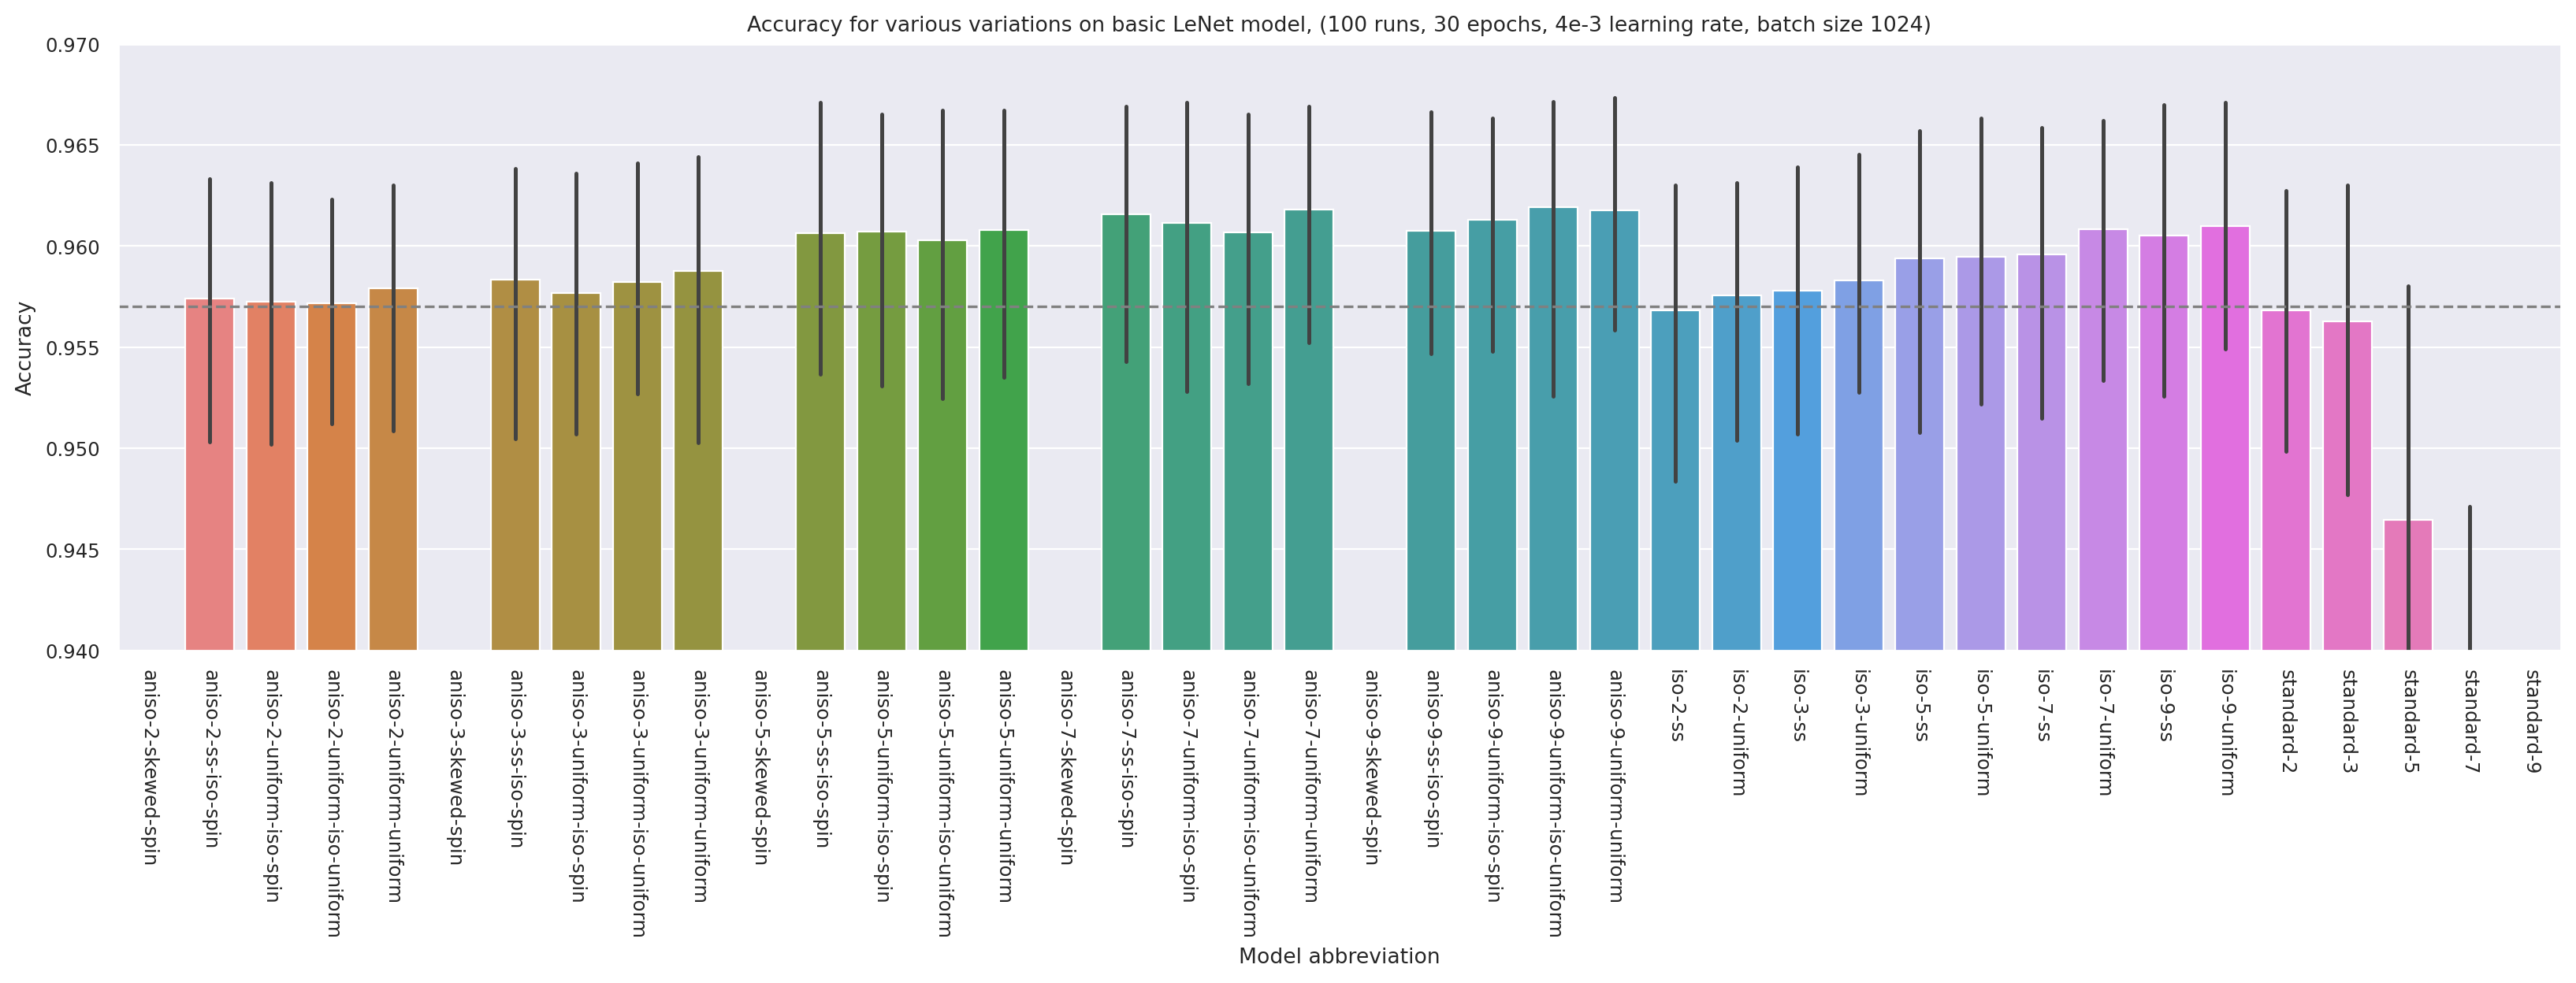

In [44]:
full_df = pl.concat((pl.scan_parquet(".data/thierry_long.pq"), pl.scan_parquet(".data/thierry_extend.pq")),
                    how='horizontal')
full_df = pl.scan_parquet(".data/long_kmnist.pq")
cols = sorted(full_df.collect_schema().names())
df = full_df.select(pl.col(cols).struct.field("acc").name.keep()).collect()
# sns.barplot({'a':[0.9471, 0.9617, 0.9567, 0.9646, 0.9506, 0.9596, 0.9531, 0.9553, 0.9578, 0.9642, 0.9532, 0.9458, 0.9513, 0.953, 0.9582, 0.9526, 0.9578, 0.9631, 0.96, 0.9557]}, errorbar=("pi", 90))
plt.figure(figsize=(20, 5), dpi=200)
sns.set_theme("paper", "darkgrid")
(sns.barplot(df.to_pandas(), errorbar=("pi", 90))
 .set(ylabel="Accuracy", xlabel="Model abbreviation",
      # title="Replication of Blankenstein's LeNet results on K-MNIST (100 runs, 5 epochs, 1e-3 learning rate, batch size 32)"
      title="Accuracy for various variations on basic LeNet model, (100 runs, 30 epochs, 4e-3 learning rate, batch size 1024)"
      ))
#
plt.xticks(rotation=-90)
plt.axhline(0.957, linestyle='dashed', color='gray')
plt.ylim(0.940, 0.97)

In [7]:
hs = {}

In [7]:
# importlib.reload(src.load_data)
# from src import load_data

# k_mnist = load_data.k_mnist()
km_tune = k_mnist.tuning_split()
print(k_mnist.y_train.dtype)

torch.int64


In [5]:
fashion_tune = load_data.fashion_mnist().tuning_split()
fashion_tune

Dataset(x_train=torch.Size([42000, 1, 28, 28]), x_test=torch.Size([18000, 1, 28, 28]), y_train=torch.Size([42000]), y_test=torch.Size([18000]))

In [9]:
cifar10_tune = cifar10.tuning_split()
cifar10_tune

Dataset(x_train=torch.Size([35000, 3, 32, 32]), x_test=torch.Size([15000, 3, 32, 32]), y_train=torch.Size([35000]), y_test=torch.Size([15000]))

In [10]:
cifar_hundred_tune = load_data.cifar100().tuning_split()
cifar_hundred_tune

Dataset(x_train=torch.Size([35000, 3, 32, 32]), x_test=torch.Size([15000, 3, 32, 32]), y_train=torch.Size([35000]), y_test=torch.Size([15000]))

In [9]:
svhn_tune = load_data.svhn().tuning_split()
svhn_tune

Dataset(x_train=torch.Size([51280, 3, 32, 32]), x_test=torch.Size([21977, 3, 32, 32]), y_train=torch.Size([51280]), y_test=torch.Size([21977]))

In [ ]:
hist = HistoryCallback(cifar_hundred_tune)
lr = 0.004
CIFAR10CNN.fit_many(cifar_hundred_tune, pool_fn="aniso-7", init={"var": "ss-iso", "theta": "spin"}, count=7,
                    epoch_callback=hist, lr=lr, batch_size=1024, epochs=400)
hs_single = {lr: hist.result()}

In [10]:
# import importlib

#
# importlib.reload(src.models.utils)
# importlib.reload(src.models.trainer)
# importlib.reload(src.models.simple_lenet)
# importlib.reload(src.models)
# importlib.reload(src.load_data)
# importlib.reload(src.kernels.quadratic)
# importlib.reload(src.kernels)
# from src.models import LeNet, EXAMPLE_POOLING_FUNCTIONS
# from src import load_data
torch.set_float32_matmul_precision("high")
hs = {}
res = {}
bar = tqdm.tqdm(np.logspace(np.log10(0.001), np.log10(0.005), num=10).tolist(), unit="trial")
model = CIFAR10CNN
for lr in bar:
    bar.set_postfix(lr=lr)
    hist = HistoryCallback(svhn_tune)
    res[f'{lr=}'] = model.fit_many(svhn_tune, pool_fn="aniso-7", init={"var": "ss-iso", "theta": "spin"}, count=7,
                                   epoch_callback=hist, lr=lr, batch_size=1024, epochs=200)
    hs[lr] = hist.result()

pl.DataFrame({str(lr): vals[0] for lr, vals in hs.items()}).write_parquet(".data/tmp_tune_svhn.pq")

  0%|          | 0/10 [00:00<?, ?trial/s]

aniso-7:{'var': 'ss-iso', 'theta': 'spin'}:   0%|          | 0/7 [00:00<?, ?run/s]

aniso-7:{'var': 'ss-iso', 'theta': 'spin'}:   0%|          | 0/7 [00:00<?, ?run/s]

aniso-7:{'var': 'ss-iso', 'theta': 'spin'}:   0%|          | 0/7 [00:00<?, ?run/s]

aniso-7:{'var': 'ss-iso', 'theta': 'spin'}:   0%|          | 0/7 [00:00<?, ?run/s]

aniso-7:{'var': 'ss-iso', 'theta': 'spin'}:   0%|          | 0/7 [00:00<?, ?run/s]

aniso-7:{'var': 'ss-iso', 'theta': 'spin'}:   0%|          | 0/7 [00:00<?, ?run/s]

aniso-7:{'var': 'ss-iso', 'theta': 'spin'}:   0%|          | 0/7 [00:00<?, ?run/s]

aniso-7:{'var': 'ss-iso', 'theta': 'spin'}:   0%|          | 0/7 [00:00<?, ?run/s]

aniso-7:{'var': 'ss-iso', 'theta': 'spin'}:   0%|          | 0/7 [00:00<?, ?run/s]

aniso-7:{'var': 'ss-iso', 'theta': 'spin'}:   0%|          | 0/7 [00:00<?, ?run/s]

In [26]:
pl.read_parquet(".data/tmp_tune.pq")

0.001,0.001291549665014884,0.0016681005372000592,0.0021544346900318843,0.0027825594022071257,0.003593813663804626,0.004641588833612777,0.005994842503189409,0.007742636826811269,0.01
struct[4],struct[4],struct[4],struct[4],struct[4],struct[4],struct[4],struct[4],struct[4],struct[4]
"{0.1389,0.0,0.339513,0.077811}","{0.1729,0.0,0.41353,0.120279}","{0.1549,0.0,0.427907,0.093744}","{0.1835,0.0,0.39126,0.107173}","{0.1835,0.0,0.357323,0.092197}","{0.1848,0.003945,0.396467,0.102379}","{0.1833,0.001974,0.375827,0.101505}","{0.1845,0.003914,0.431315,0.120612}","{0.1872,0.0059,0.441694,0.122478}","{0.1919,0.037418,0.420046,0.14571}"
"{0.1633,0.0,0.328063,0.105609}","{0.1551,0.0,0.320577,0.097096}","{0.2124,0.0,0.432127,0.148746}","{0.1935,0.001959,0.407659,0.135276}","{0.2365,0.01173,0.432544,0.179281}","{0.2314,0.014706,0.411713,0.170246}","{0.2642,0.009268,0.435835,0.242152}","{0.3039,0.003846,0.446287,0.261608}","{0.2855,0.028674,0.43197,0.244255}","{0.215,0.026743,0.411581,0.174714}"


In [42]:
# hs_old = hs

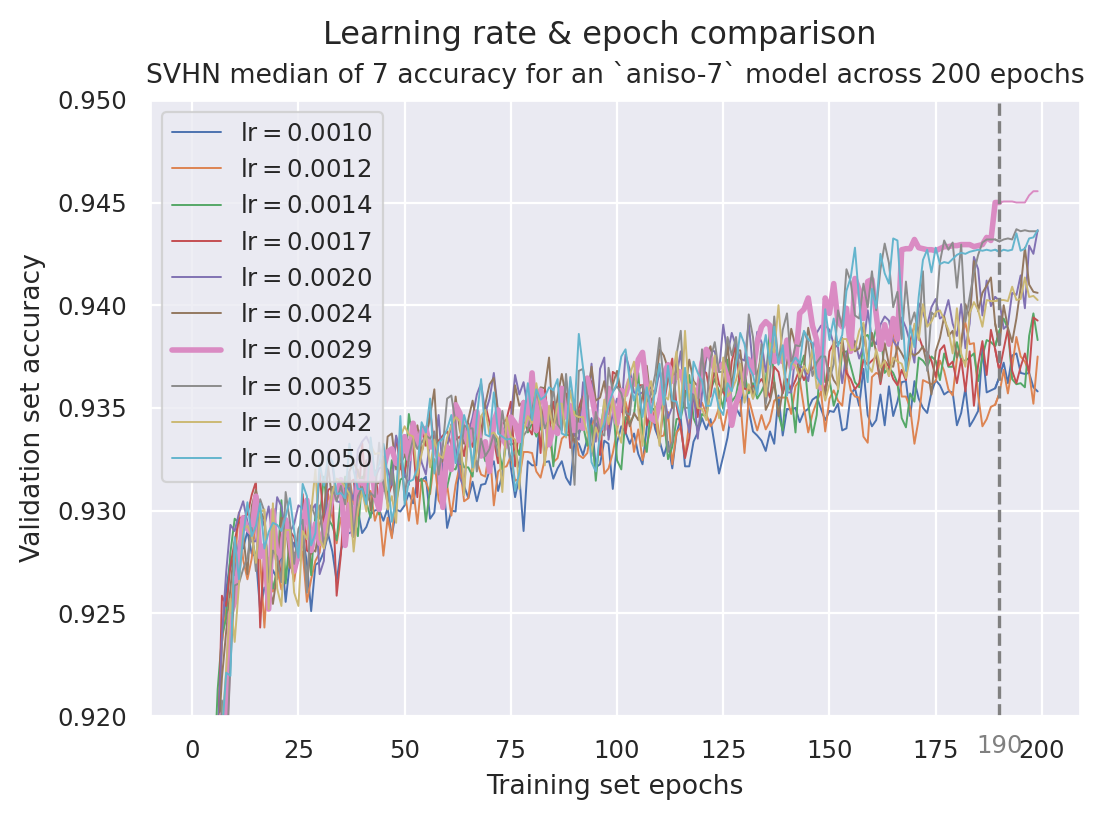

In [12]:
sns.set_theme("paper", "darkgrid")
plt.figure(dpi=200, figsize=(6, 4))
cutoff = 190
n_epochs = 200
for i, (lr, (vls, trns)) in enumerate(hs.items()):
    vals = np.median(vls["acc"].to_numpy().reshape(7, n_epochs), axis=0)
    color = plt.plot(range(cutoff + 1), vals[:cutoff + 1], label=f"lr$= {lr:.4f}$",
                     linewidth=0.7 if round(lr, 4) not in (0.0029,) else 2)[
        0].get_color()
    plt.plot(range(cutoff - 1, n_epochs), vals[cutoff - 1:], color=color, linewidth=0.7)
# plt.ylim(0.95, 0.98)
plt.ylim(0.92, 0.95)
# plt.ylim(0.79, 0.84)
plt.suptitle("Learning rate & epoch comparison")
plt.title(f"SVHN median of 7 accuracy for an `aniso-7` model across {n_epochs} epochs")
plt.xlabel("Training set epochs")
plt.ylabel("Validation set accuracy")
plt.axvline(cutoff, linestyle='dashed', color='gray')
# plt.text(cutoff + 3, 0.91, "Proposed cutoff", color='gray')
plt.xticks([cutoff], [f"{cutoff}"], minor=True)
plt.tick_params("x", colors="gray", which="minor")
plt.legend()

In [13]:
hist = HistoryCallback(svhn_tune)
res[f'{lr=}'] = model.fit_many(svhn_tune, pool_fn="aniso-7", init={"var": "ss-iso", "theta": "spin"}, count=7,
                               epoch_callback=hist, lr=0.003, batch_size=1024, epochs=300)
hs_temp = hist.result()

aniso-7:{'var': 'ss-iso', 'theta': 'spin'}:   0%|          | 0/7 [00:00<?, ?run/s]

(0.92, 0.95)

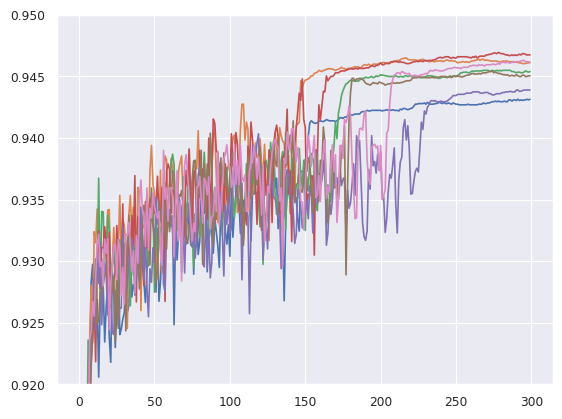

In [22]:
plt.plot(hs_temp[0]["acc"].to_numpy().reshape(7, 300).T)
plt.ylim(0.92, 0.95)

In [45]:
k_mnist

Dataset(x_train=torch.Size([60000, 1, 28, 28]), x_test=torch.Size([10000, 1, 28, 28]), y_train=torch.Size([60000]), y_test=torch.Size([10000]))

In [46]:
model = LeNet(1, 10, "aniso-7")
k0 = model.net[2].kernel()
model.fit(k_mnist, epochs=30, batch_size=1024, lr=0.004)

Training:   0%|          | 0/30 [00:00<?, ?epoch/s]

In [54]:
k = model.net[2].kernel()
k.shape

torch.Size([20, 1, 7, 7])

In [64]:
model.evaluate(k_mnist, batch_size=10_000)

{'o': {'precision': 0.9670658682634731,
  'recall': 0.969,
  'f1-score': 0.968031968031968,
  'support': 1000.0},
 'ki': {'precision': 0.9694189602446484,
  'recall': 0.951,
  'f1-score': 0.9601211509338717,
  'support': 1000.0},
 'su': {'precision': 0.9630390143737166,
  'recall': 0.938,
  'f1-score': 0.950354609929078,
  'support': 1000.0},
 'tsu': {'precision': 0.9639024390243902,
  'recall': 0.988,
  'f1-score': 0.9758024691358025,
  'support': 1000.0},
 'na': {'precision': 0.9645030425963489,
  'recall': 0.951,
  'f1-score': 0.9577039274924471,
  'support': 1000.0},
 'ha': {'precision': 0.9765784114052953,
  'recall': 0.959,
  'f1-score': 0.9677093844601413,
  'support': 1000.0},
 'ma': {'precision': 0.9495635305528612,
  'recall': 0.979,
  'f1-score': 0.9640571147218119,
  'support': 1000.0},
 'ya': {'precision': 0.9730538922155688,
  'recall': 0.975,
  'f1-score': 0.974025974025974,
  'support': 1000.0},
 're': {'precision': 0.9635826771653543,
  'recall': 0.979,
  'f1-score': 0

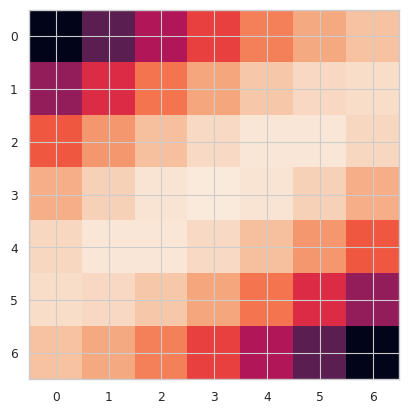

In [75]:
plt.imshow(k[8, 0].numpy(force=True))

In [76]:
torch.ones(3, device='cuda')

tensor([1., 1., 1.], device='cuda:0')

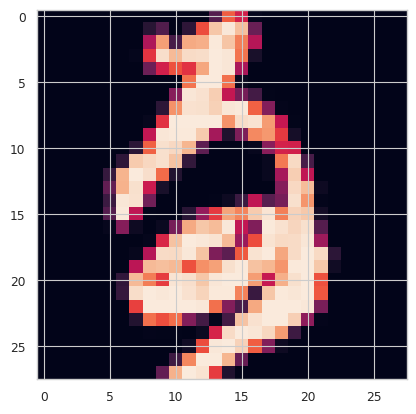

In [81]:
plt.imshow(k_mnist.x_train[4, 0])